# Exploratory Data Analysis - Avocado Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## initial visualization on data

In [2]:
df = pd.read_csv("avocado.csv")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
          Unnamed: 0        Date  AveragePrice  Total Volume          4046  \
count   18249.000000       18249  18249.000000  1.824900e+

In [3]:
#cek missing values
print(df.isna().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


no missing values

In [4]:
#drop unrelevant columns
df = df.drop(columns=["Unnamed: 0"])

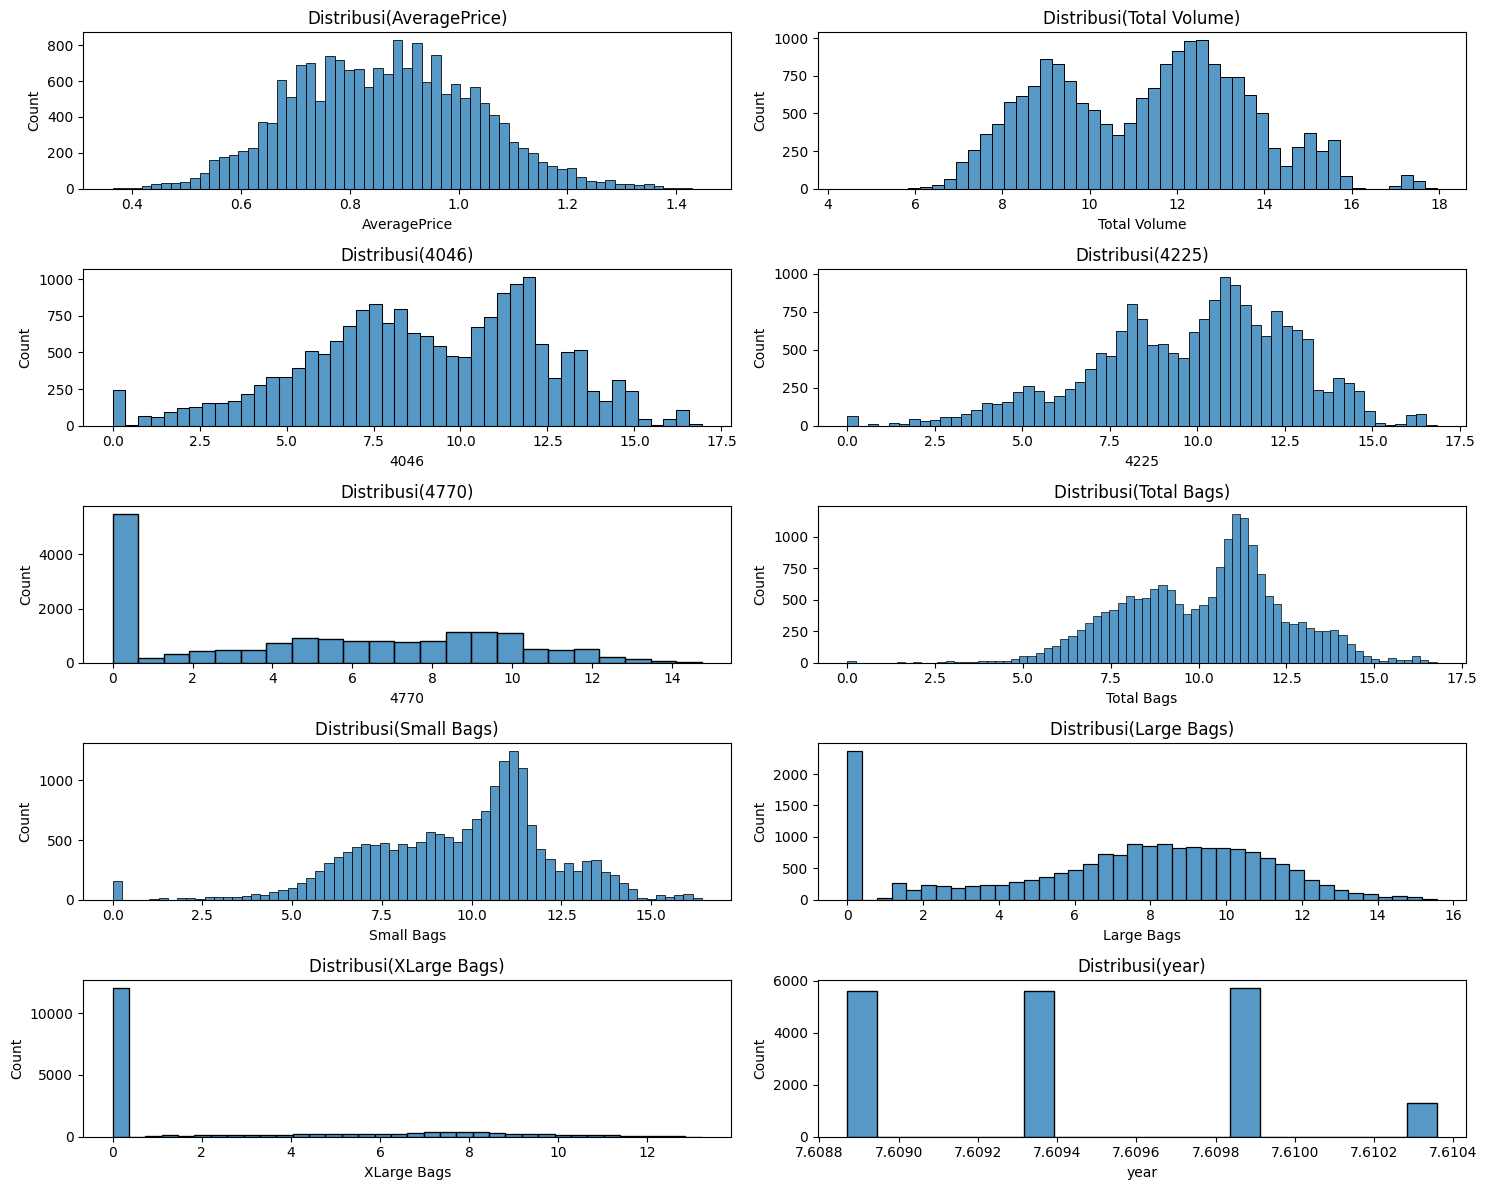

In [5]:
# numeric columns
nc = df.select_dtypes(include=["float64", "int64"]).columns

# plot
nrows, ncols = 5, 2  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(nc[:nrows * ncols]):  
    
    sns.histplot(np.log1p(df[col]), kde=False, ax=axes[i]) #pake log1p transform untuk distribusi yang skewed
    axes[i].set_title(f"Distribusi({col})")

plt.tight_layout()
plt.show()

A. Average Price
distribusinya menyerupai normal, dengan mayoritas harga rata-rata alpukat berkisar 0.7 – 1.0 USD per buah. Outlier harga sangat tinggi atau rendah jarang terjadi.

B. Total Volume
distribusi cenderung bimodal (ada dua puncak), artinya ada dua kelompok pasar dengan volume penjualan berbeda. Sebagian besar volume berada di sekitar 9 – 13 juta unit.

C. PLU Codes (4046, 4225, 4770)
4046 & 4225 → Distribusi relatif mirip, mayoritas berkisar di 7 – 12 juta unit, artinya dua tipe ini paling dominan.
4770 → Sangat skewed ke kiri. Sebagian besar datanya 0 (jarang dijual), hanya sedikit data dengan volume cukup tinggi.

D. Total Bags
mirip dengan distribusi total volume (karena related). Puncaknya di sekitar 10 – 12 juta unit.

E. Small Bags
distribusi terlihat normal dengan dominasi di kisaran 10 – 12 juta unit. Sebagian besar penjualan avocado dikemas dalam small bags.

F. Large Bags & XLarge Bags
Banyak data di titik 0, menunjukkan penjualan large dan extra-large bags jauh lebih sedikit dibanding small bags.

G. Year
distribusi merata per tahun.

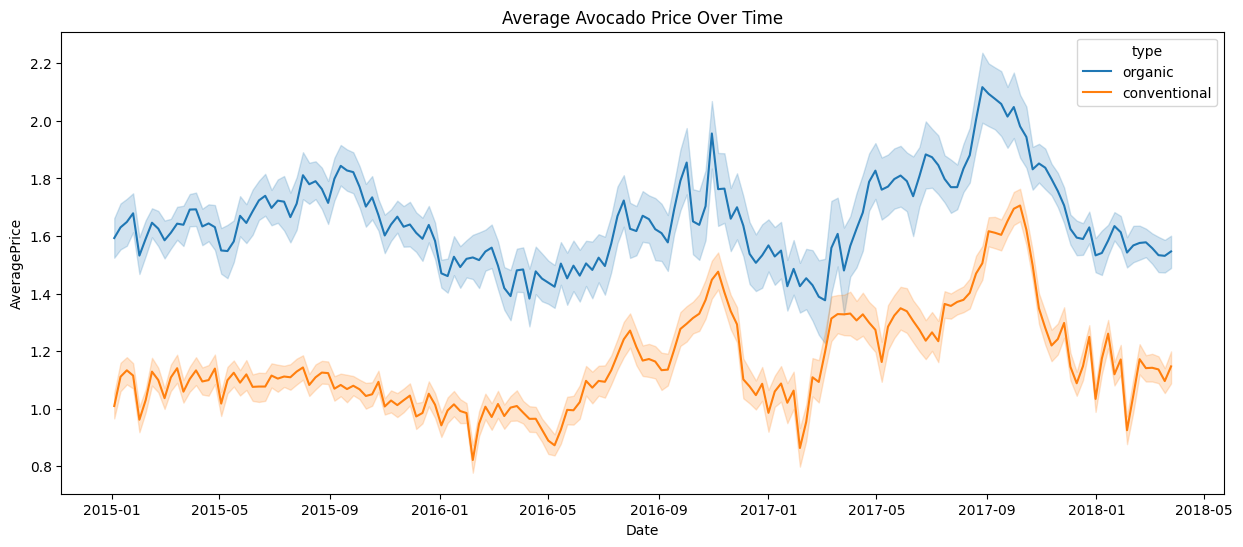

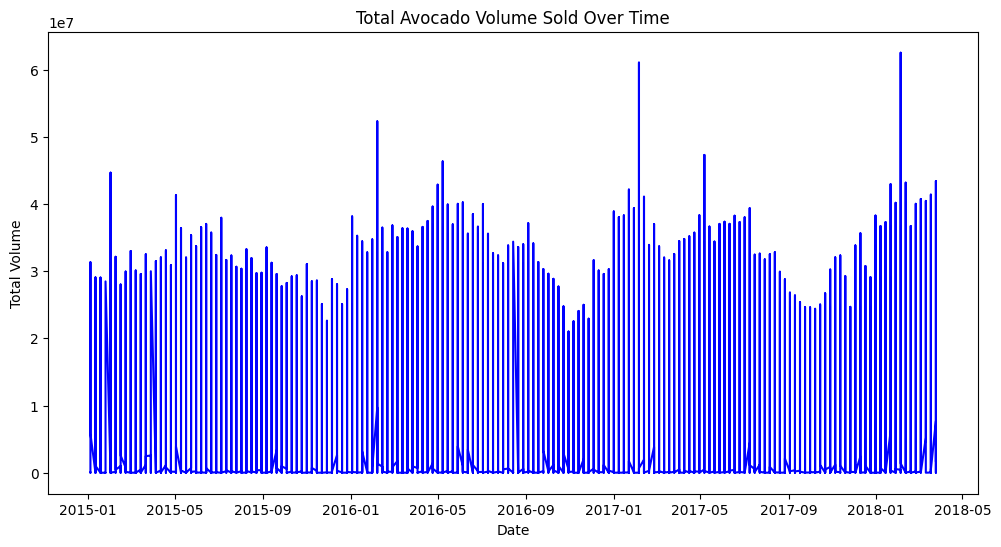

In [6]:
#date convert jadi datetime
df['Date'] = pd.to_datetime(df['Date'])

#AveragePrice over time (overall)
df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df)
plt.title('Average Avocado Price Over Time')
plt.show()

#total volume over time (overall)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Total Volume'], color='blue')
plt.title("Total Avocado Volume Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.show()


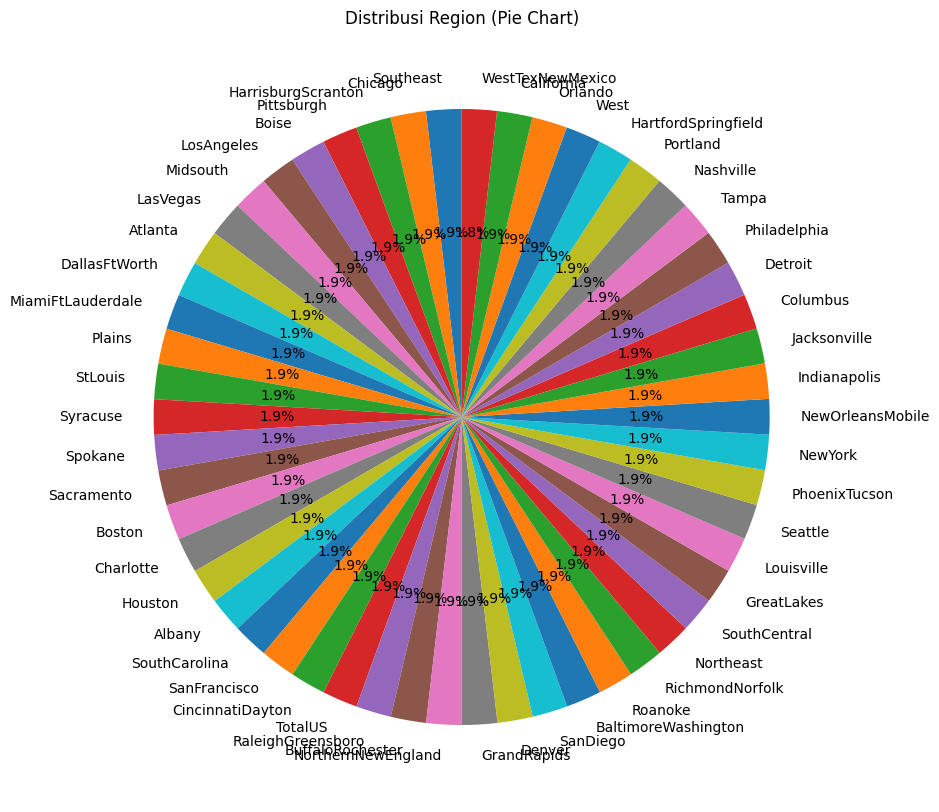

In [7]:
#region jadiin piechart biar lebih keliatan
plt.figure(figsize=(10,10))
df['region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title("Distribusi Region (Pie Chart)")
plt.show()


In [8]:
#ngubah yg 'object' biar data bisa diproses

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 1.9 MB


check correlation

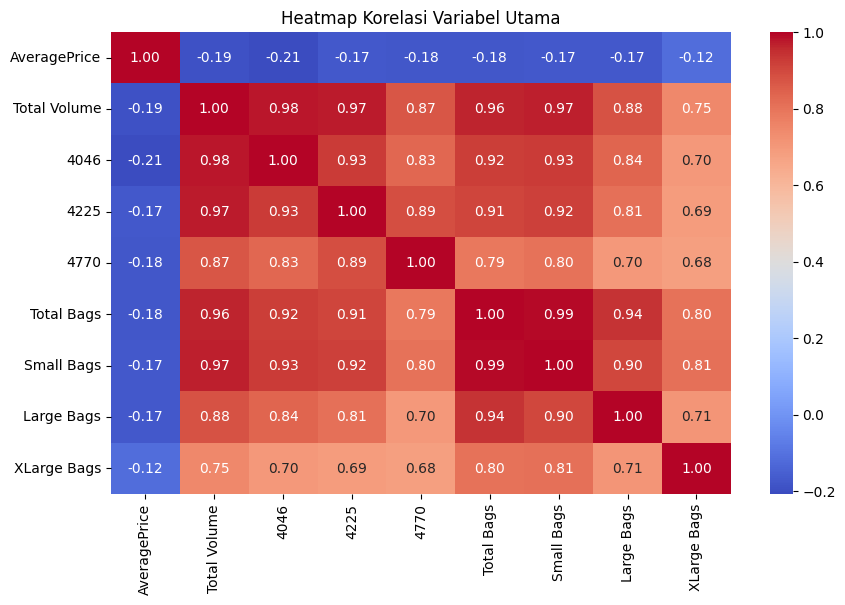

In [9]:
relcol = ["AveragePrice", "Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]

plt.figure(figsize=(10,6))
sns.heatmap(df[relcol].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Variabel Utama")
plt.show()


Harga avocado lebih sensitif terhadap jumlah supply. Semakin besar volume penjualan, terutama dari PLU 4046, harga cenderung turun. Sedangkan antar variabel volume & bags memang redundan (saling sangat berkorelasi).

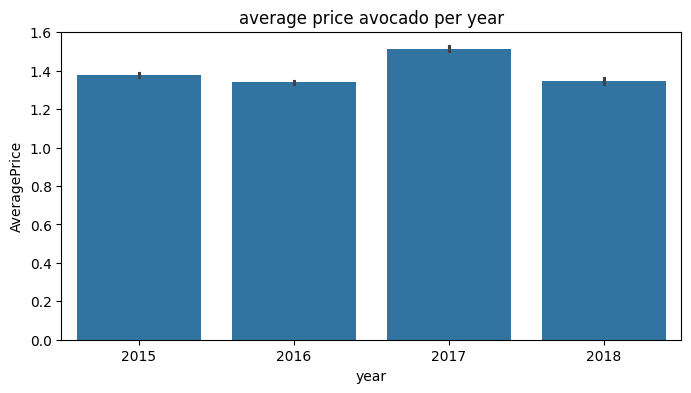

In [10]:
plt.figure(figsize=(8,4))
sns.barplot(x="year", y="AveragePrice", data=df, estimator="mean")
plt.title("average price avocado per year")
plt.show()


Harga avocado mengalami lonjakan di tahun 2017, namun kembali turun di 2018

In [ ]:
df.to_csv('cleanedData.csv', index=False)